<a href="https://colab.research.google.com/github/sandeeprairai/Machine-Learning/blob/main/Decision_Boundary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Practice_Ml_code/Knn/Social_Network_Ads.csv')

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
X=df.iloc[:,2:4].values

In [ ]:
X.shape

(400, 2)

In [ ]:
y=df.iloc[:,-1].values

In [ ]:
y.shape

(400,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [ ]:
X_train.shape

(320, 2)

In [ ]:
X_test.shape

(80, 2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)
X_train

array([[-0.812582  ,  0.29566626],
       [-0.05559149,  0.12227615],
       [-1.09645344, -1.58272659],
       [ 0.41752758, -0.13780901],
       [ 0.70139902, -1.09145461],
       [ 0.22827995, -0.25340242],
       [ 0.41752758,  0.58464977],
       [-0.43408675,  1.24931186],
       [-0.33946293, -1.29374308],
       [ 1.45838953,  2.11626241],
       [-0.24483912,  0.78693824],
       [-1.66419633,  0.35346296],
       [-0.812582  ,  2.26075416],
       [-1.00182963, -0.34009747],
       [-0.43408675, -0.28230077],
       [-0.90720582, -0.31119912],
       [ 2.12075623,  0.93142999],
       [-1.28570107, -0.42679253],
       [ 0.03903232,  1.22041351],
       [ 0.32290377, -0.71577604],
       [-0.52871056, -1.49603154],
       [-0.05559149,  0.0355811 ],
       [ 2.02613242,  2.11626241],
       [ 1.9315086 , -1.35153978],
       [-0.05559149,  0.26676791],
       [-1.66419633, -0.60018264],
       [ 0.98527046, -0.83136945],
       [-1.09645344, -1.58272659],
       [-0.24483912,

In [ ]:
X_test=scaler.transform(X_test)
X_test

array([[-1.09645344,  0.41125967],
       [ 0.89064665, -1.29374308],
       [ 1.9315086 ,  0.90253164],
       [ 2.02613242, -1.17814967],
       [ 0.32290377, -0.28230077],
       [-0.43408675, -1.12035297],
       [-0.33946293, -0.77357275],
       [-0.24483912, -0.28230077],
       [-1.28570107, -1.23594637],
       [ 0.03903232,  0.0355811 ],
       [ 0.79602284,  0.35346296],
       [-1.00182963,  1.9428723 ],
       [ 0.41752758, -0.13780901],
       [ 1.36376572,  2.31855087],
       [-0.52871056,  0.46905637],
       [ 0.98527046,  0.75803988],
       [ 0.41752758,  0.29566626],
       [ 1.83688479, -1.06255626],
       [ 0.60677521, -0.88916615],
       [ 0.98527046,  0.58464977],
       [-0.62333437,  0.18007285],
       [-1.66419633,  0.35346296],
       [ 0.89064665,  1.24931186],
       [-0.24483912, -0.91806451],
       [-0.812582  , -0.77357275],
       [ 0.03903232,  1.24931186],
       [-1.00182963, -0.45569088],
       [-0.1502153 , -0.19560572],
       [-1.4749487 ,

In [ ]:
#1st method
np.sqrt(X_train.shape[0])

17.88854381999832

In [ ]:
k=17

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=k)

In [ ]:
#Train our model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [ ]:
y_pred=knn.predict(X_test)

In [ ]:
y_pred.shape

(80,)

In [ ]:
y_test.shape

(80,)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.875

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[46,  6],
       [ 4, 24]])

In [ ]:
#Effect  of K on Training Error rate and validation Error rate

error_train=[]
error_test=[]



for i in range(1,26):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  x=confusion_matrix(y_train,knn.predict(X_train))
  y=confusion_matrix(y_test,knn.predict(X_test))
  error_train.append((x[0][1]+x[1][0])/x.sum())
  error_test.append((y[0][1]+y[1][0])/y.sum())

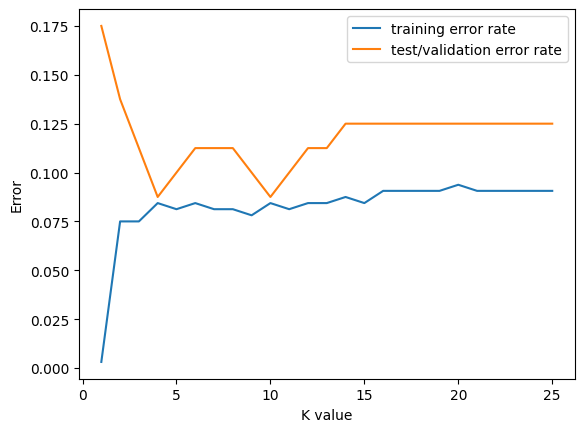

In [ ]:
plt.plot(range(1,26),error_train,label='training error rate')
plt.plot(range(1,26),error_test,label='test/validation error rate')
plt.xlabel('K value')
plt.ylabel('Error')
plt.legend()

In [ ]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
y_pred=knn.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9

In [ ]:
def predict_output():
  age=int(input("Enter the age:"))
  salary=int(input("Enter the salary:"))


  X_new=np.array([[age],[salary]]).reshape(1,2)
  X_new=scaler.transform(X_new)

  if knn.predict(X_new)[0]==0:
    return "Will not purchase"

  else:
    return "Wiil Purchase"

In [ ]:
predict_output()

Enter the age:23
Enter the salary:4500


'Will not purchase'

#Decision Boundary for Knn

In [ ]:
#Step1 ->> Train the classifier training set


In [ ]:
#step 2  Creating a Meshgrid
a=np.arange(start=X_train[:,0].min()-1, stop=X_train[:,0].max()+1, step=0.01)
b=np.arange(start=X_train[:,1].min()-1, stop=X_train[:,1].max()+1, step=0.01)


XX,YY=np.meshgrid(a,b)

In [ ]:
XX.shape

(591, 598)

In [ ]:
YY.shape

(591, 598)

In [ ]:
# Classify every point on the meshgrid

input_array=np.array([XX.ravel(),YY.ravel()]).T

labels=knn.predict(input_array)

In [ ]:
labels.shape

(353418,)

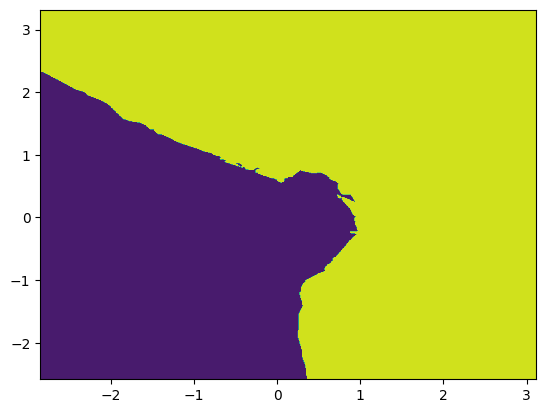

In [ ]:
#Step 4 Plotting the array as an image
plt.contourf(XX,YY,labels.reshape(XX.shape))

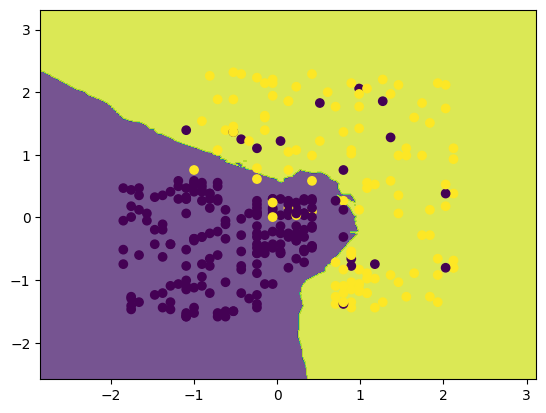

In [ ]:
#step 5
plt.contourf(XX,YY,labels.reshape(XX.shape), alpha=0.75)
plt.scatter(X_train[:,0],X_train[:,1], c=y_train)

In [ ]:
#Effect of K on Decision Boundary
from sklearn.neighbors import KNeighborsClassifier

def keffect(data,k):
    data=pd.read_csv('toy_datasets/{}'.format(data))
    X=data.iloc[:,:2].values
    y=data.iloc[:,-1].values

    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)

    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)

    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=knn.predict(input_array)

    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)